In [52]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import preprocessing
from tensorflow.keras import regularizers




In [53]:
df = pdr.get_data_yahoo('spy')
df['Open'] = preprocessing.scale(df['Open'])
df['High'] = preprocessing.scale(df['High'])
df['Close'] = preprocessing.scale(df['Close'])
df['Low'] = preprocessing.scale(df['Low'])

In [54]:
# plt.hist(df['Open'])

In [55]:
# plt.hist(df['High'])

In [56]:
# plt.hist(df['Low'])

In [57]:
# plt.hist(df['Close'])

In [74]:

df['x1'] = df['Open'] - df['High']
df['x2'] = df['High'] - df['Low']
df['x3'] = df['Close'] - df['Open']
df['y'] = df['Close'].shift(-1).pct_change(1)
df['y'] = np.where(df['y'] > 0, 1, 0)
print(df[['x1', 'x2', 'x3','y']].describe())

x1            x2            x3            y
count  1.257000e+03  1.257000e+03  1.257000e+03  1257.000000
mean  -1.179998e-16 -3.335085e-16  4.526566e-16     0.504375
std    4.144371e-02  6.545735e-02  5.467061e-02     0.500180
min   -3.667068e-01 -7.696029e-02 -3.514612e-01     0.000000
25%   -8.252648e-03 -3.639622e-02 -1.812816e-02     0.000000
50%    1.194803e-02 -1.930575e-02  1.619161e-03     1.000000
75%    2.265864e-02  1.167864e-02  2.267398e-02     1.000000
max    4.125557e-02  5.134776e-01  2.962031e-01     1.000000


In [75]:
# df[:10]

In [76]:
# df['x3'].plot()

In [77]:
split = 0.8
df = df.reset_index()
x_train = df[:int(len(df)*split)][['x1', 'x2', 'x3', 'Open', 'Low', 'Close', 'High']]
y_train = df[:int(len(df)*split)][['y']]
x_test = df[int(len(df)*split):][['x1', 'x2', 'x3','Open', 'Low', 'Close', 'High']]
y_test = df[int(len(df)*split):][['y']]

In [82]:
model = Sequential()
model.add(Dense(32,  activation='relu', kernel_regularizer=regularizers.L2(l2=0.01), input_shape = (7,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 9)                 585       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 10        
Total params: 2,963
Trainable params: 2,963
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics =['accuracy'])

In [85]:
history = model.fit(x_train, y_train, epochs= 10, batch_size=32, validation_split=0.3)

Epoch 1/10
22/22 [==============================] - 0s 18ms/step - loss: 1.1688 - accuracy: 0.5363 - val_loss: 1.1127 - val_accuracy: 0.5364
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0651 - accuracy: 0.5462 - val_loss: 1.0218 - val_accuracy: 0.5364
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.9836 - accuracy: 0.5491 - val_loss: 0.9501 - val_accuracy: 0.5298
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.9198 - accuracy: 0.5448 - val_loss: 0.8938 - val_accuracy: 0.5132
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.8691 - accuracy: 0.5434 - val_loss: 0.8493 - val_accuracy: 0.5099
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.8295 - accuracy: 0.5206 - val_loss: 0.8149 - val_accuracy: 0.5099
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.7983 - accuracy: 0.5377 - val_loss: 0.7879 - val_accuracy: 0.5132
Epoch 8/10
22/22 [=

In [86]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.5714


[0.7368851900100708, 0.5714285969734192]

In [63]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history['val_'+metric],'')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

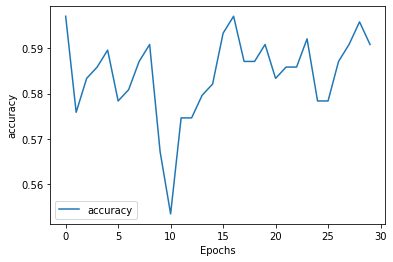

In [64]:
plot_graphs(history, 'accuracy')